<a href="https://colab.research.google.com/github/theshoaibshafique/Deeplearing_with_fast.ai/blob/master/Weather_Conditions_Classification_with_Fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#  !pip install -q kaggle

In [12]:
#Click on Create New API Token -
#It will download kaggle.json file on your machine.
#upload that file
# from google.colab import files
# files.upload()

In [13]:
# !mkdir ~/.kaggle
# !mv ./kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d theshoaib/weather-dataset
# !unzip '/content/weather-dataset.zip'

In [14]:
from fastcore.all import *
from fastai.vision.all import *

In [15]:
path = Path('/content/Multi-class Weather Dataset')

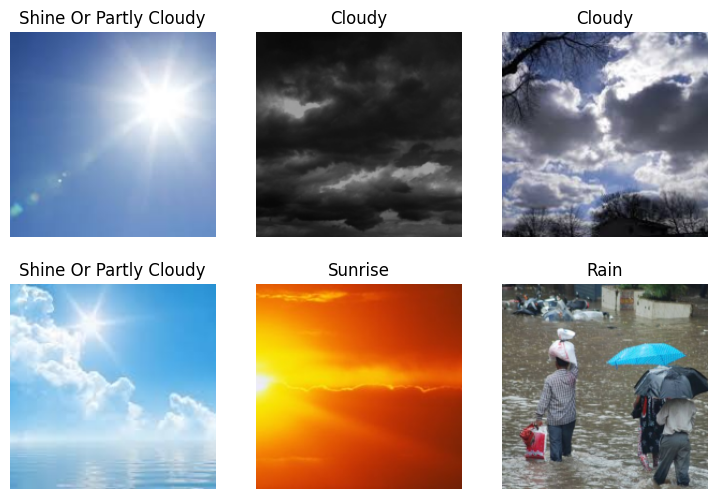

In [16]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192)]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [17]:
learn = vision_learner(dls, resnet18 , metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 154MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.092088,0.106284,0.040000,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.244753,0.091446,0.044444,00:09
1,0.184927,0.032524,0.013333,00:08
2,0.135564,0.029689,0.008889,00:10
3,0.092728,0.030354,0.013333,00:07
4,0.064593,0.032973,0.017778,00:10


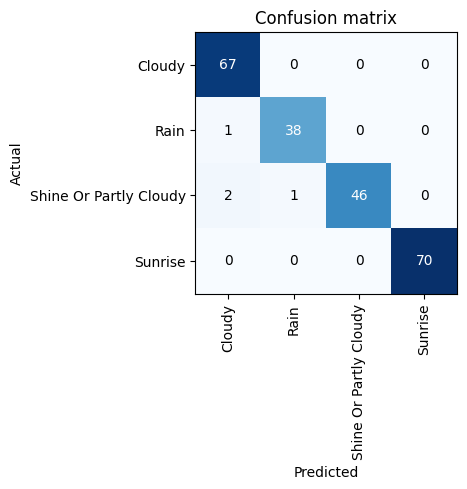

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

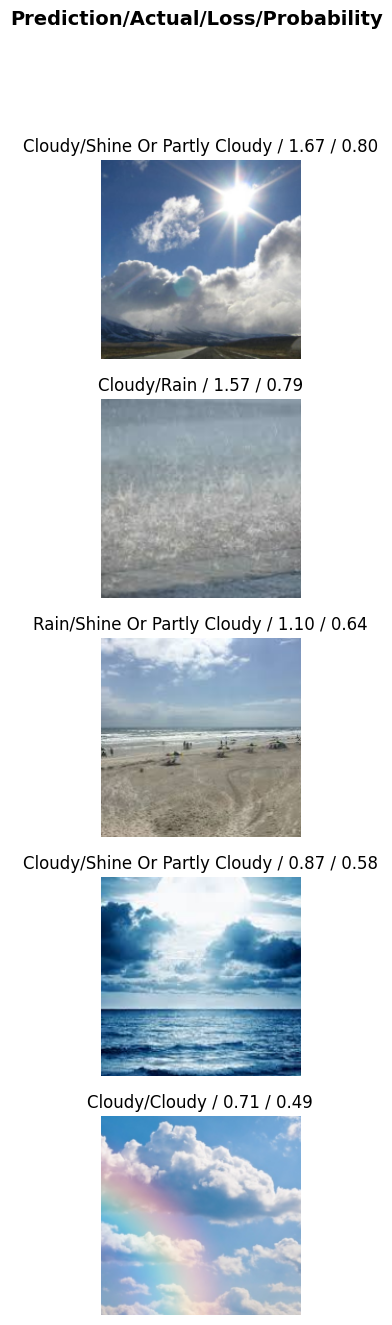

In [19]:
interp.plot_top_losses(5,nrows=5 )

In [20]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [21]:
learn.export('model.pkl')